### Closed form Solver 

In [8]:
#loading_data

import pickle
pkl_file = "/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Platforms for Experments/Data/Closed_form_Data_ExecutionTime_intercept_5_2024-05-30 16:03:08, n_train_650,n_test_100, tensor_dimensions:[32 32], tensor_mode_= ranks:[4 4], separation_rank:2, max_iter=50.pkl"
file= open(pkl_file, 'rb')
closed_data = pickle.load(file)
file.close()

best_lambda = closed_data[0]
closed_normalized_estimation_error = closed_data[1]
closed_nmse = closed_data[2]
closed_r2 = closed_data[3]
closed_correlation = closed_data[4]
closed_objective_fuction_values = closed_data[5]


print("Error Report on Testing _ With best Lambda")
print("Alpha chosen for model: ", best_lambda)
print("Test Normalized Estimation Error: ", closed_normalized_estimation_error)
print("Test NMSE Loss: ", closed_nmse)
print("Test R2 Loss: ", closed_r2)
print("Test Correlation: ", closed_correlation)
print("Final Fucntion Values:",closed_objective_fuction_values[-1,1,2])


Error Report on Testing _ With best Lambda
Alpha chosen for model:  50
Test Normalized Estimation Error:  0.0049797581304228756
Test NMSE Loss:  0.0003379277858853802
Test R2 Loss:  0.9953148384356248
Test Correlation:  0.9976871220035715
Final Fucntion Values: 101945.65675078394


### Gradient Descent 

In [9]:
#dill.dump((lambda1, normalized_estimation_error_GD, test_nmse_loss_GD, test_R2_loss_GD, test_correlation_GD, objective_function_values_GD), file)

pkl_file = "/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Platforms for Experments/Data/Gradient_Descent_ExecutionTime_intercept_5_2024-05-30 16:03:34, n_train_650,n_test_100, tensor_dimensions:[32 32], tensor_mode_= ranks:[4 4], separation_rank:2, max_iter=50.pkl"
file= open(pkl_file, 'rb')
gd_data = pickle.load(file)
file.close()


best_lambda = gd_data[0]
gd_normalized_estimation_error = gd_data[1]
gd_nmse = gd_data[2]
gd_r2 = gd_data[3]
gd_correlation = gd_data[4]
gd_objective_fuction_values = gd_data[5]

print("Error Report on Testing _ With best Lambda")
print("Alpha chosen for model: ", best_lambda)
print("Test Normalized Estimation Error: ", gd_normalized_estimation_error)
print("Test NMSE Loss: ", gd_nmse)
print("Test R2 Loss: ", gd_r2)
print("Test Correlation: ", gd_correlation)
print("Final Objevtive Function Vlaue:", gd_objective_fuction_values[-1,1,2])



Error Report on Testing _ With best Lambda
Alpha chosen for model:  50
Test Normalized Estimation Error:  0.002269402651557348
Test NMSE Loss:  0.00013771230174478832
Test R2 Loss:  0.9980907033691063
Test Correlation:  0.999090846443973
Final Objevtive Function Vlaue: 101629.63003389393


### Stochastic Solver 

In [19]:
#dill.dump((lsr_tensor_SGD,X_train_Full, Y_train_Full, X_test_Full, Y_test_Full, B_tensored, lambda1, normalized_estimation_error_SGD, test_nmse_loss_SGD, test_R2_loss_SGD, test_correlation_SGD, objective_function_values_SGD), file)

#importing path 
import sys
sys.path.append('/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Platforms for Experments/CodeFiles')

#esssential libraries
from sklearn.linear_model import Ridge
import numpy as np
from LSR_Tensor_2D_v1 import LSR_tensor_dot
from lsr_bcd_regression import lsr_bcd_regression
from optimization import inner_product, R2, objective_function_vectorized

import pickle
pkl_file = "/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Platforms for Experments/Data/SGD_ExecutionTime_intercept_5_2024-05-31 15:24:03, n_train_650,n_test_100, tensor_dimensions:[32 32], tensor_mode_= ranks:[4 4], separation_rank:2, max_iter=15.pkl"
file= open(pkl_file, 'rb')
sgd_data = pickle.load(file)
file.close()

#dill.dump((lsr_tensor_SGD,lambda1, normalized_estimation_error_SGD, test_nmse_loss_SGD, test_R2_loss_SGD, test_correlation_SGD, objective_function_values_SGD,gradient_values_SGD, iterate_differences_SGD,epoch_level_gradients_SGD), file)

lsr_tensor_SGD = sgd_data[0]
best_lambda = sgd_data[1]
sgd_normalized_estimation_error = sgd_data[2]
sgd_nmse = sgd_data[3]
sgd_r2 = sgd_data[4]
sgd_correlation = sgd_data[5]
sgd_objective_function_values = sgd_data[6]
sgd_gradient_values = sgd_data[7]
sgd_iterate_differences = sgd_data[8]
sgd_epoch_level_gradients = sgd_data[9]

print("Error Report on Testing _ With best Lambda")
print("Alpha chosen for model: ", best_lambda)
print("Test Normalized Estimation Error: ", sgd_normalized_estimation_error)
print("Test NMSE Loss: ", sgd_nmse)
print("Test R2 Loss: ", sgd_r2)
print("Test Correlation: ", sgd_correlation)
print("Final Objevtive Function Vlaue:", sgd_objective_function_values[-1,1,2])




Error Report on Testing _ With best Lambda
Alpha chosen for model:  50
Test Normalized Estimation Error:  0.05204865945109167
Test NMSE Loss:  0.0034687263551888494
Test R2 Loss:  0.9519082357963363
Test Correlation:  0.9761451930917611
Final Objevtive Function Vlaue: 94248.1330408282


### Plotting Objective Function Values

Here I am plotting the objective functions values after each BCD iteration.

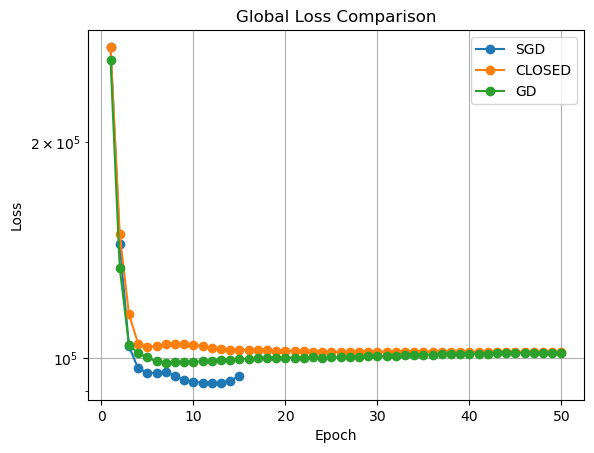

Final Objective Function Value CLOSED: [101945.65675078]
Final Objective Function Value SGD: [94248.13304083]
Final Objective Function Value GD: [101629.63003389]


In [22]:
import matplotlib.pyplot as plt

# Plotting SGD Loss
objective_function_values_SGD = sgd_objective_function_values[:, 1, 2].reshape(-1,1)
objective_fuction_values_Closed = closed_objective_fuction_values[:,1,2].reshape(-1,1)
objective_function_values_GD = gd_objective_fuction_values[:,1,2].reshape(-1,1)
 

#All loss function values in one plot

plt.figure()

# Plotting SGD
plt.plot(range(1, len(objective_function_values_SGD) + 1), objective_function_values_SGD, label='SGD',marker = 'o')

# Plotting CLOSED
plt.plot(range(1, len(objective_fuction_values_Closed) + 1), objective_fuction_values_Closed, label='CLOSED',marker = 'o')

# Plotting GD
plt.plot(range(1, len(objective_function_values_GD) + 1), objective_function_values_GD, label='GD',marker = 'o')

# Setting the title and labels
plt.title('Global Loss Comparison')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Adding a legend to distinguish the two plots
plt.legend()

# Display the plot
plt.show()

print('Final Objective Function Value CLOSED:',objective_fuction_values_Closed[-1])
print('Final Objective Function Value SGD:',objective_function_values_SGD[-1])
print('Final Objective Function Value GD:',objective_function_values_GD[-1])



### Objective Function Difference 

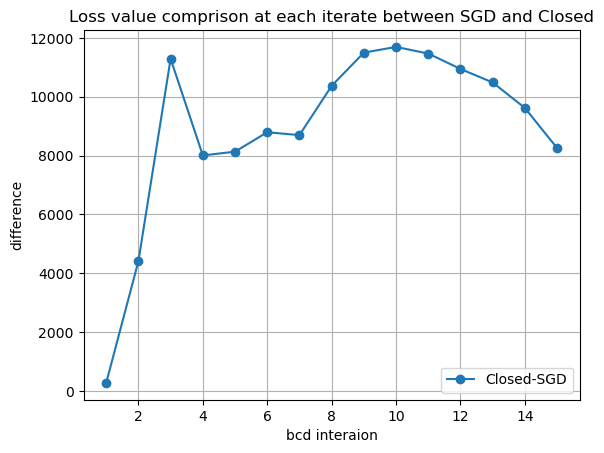

In [25]:
#plotting the difference between the iterates from SGD and Closed 

number_of_iter = len(objective_function_values_SGD)



SGD_Closed_diff = objective_fuction_values_Closed[:number_of_iter] - objective_function_values_SGD


#plotting the difference 
plt.figure()
plt.plot(range(1, len(objective_function_values_SGD) + 1), SGD_Closed_diff, label='Closed-SGD',marker = 'o')
# Setting the title and labels
plt.title('Loss value comprison at each iterate between SGD and Closed')
#plt.yscale('log')
plt.xlabel('bcd interaion')
plt.ylabel('difference')
plt.grid(True)
plt.legend()
plt.show()


### Iterate difference 

(15, 2, 3)


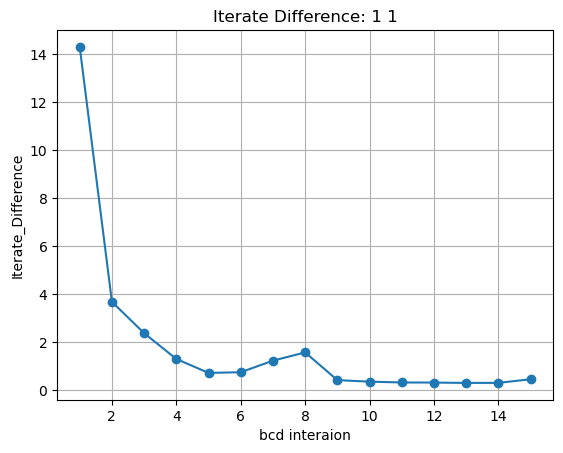

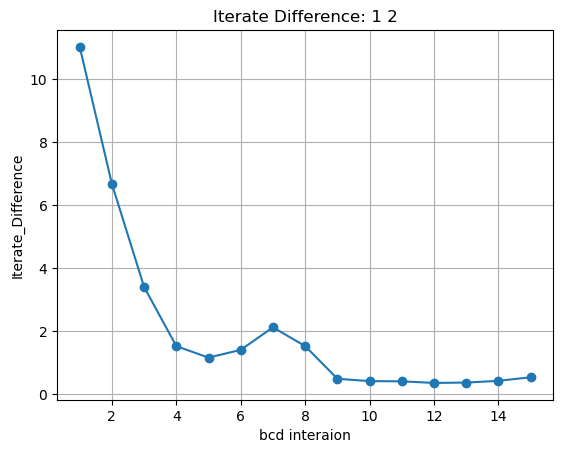

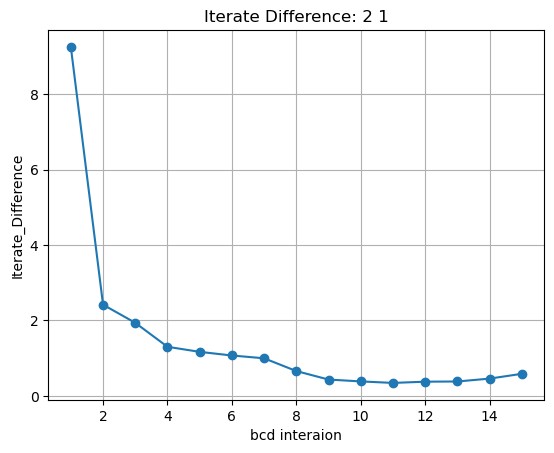

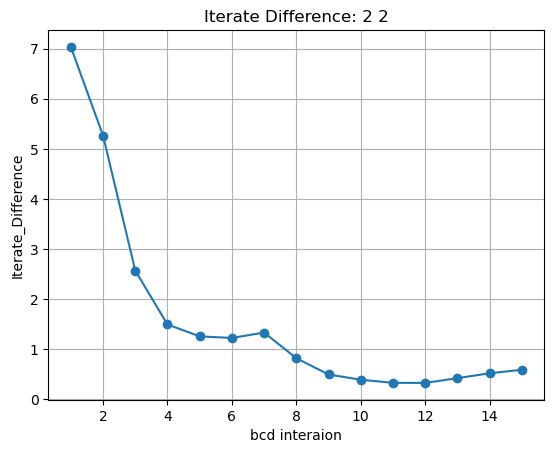

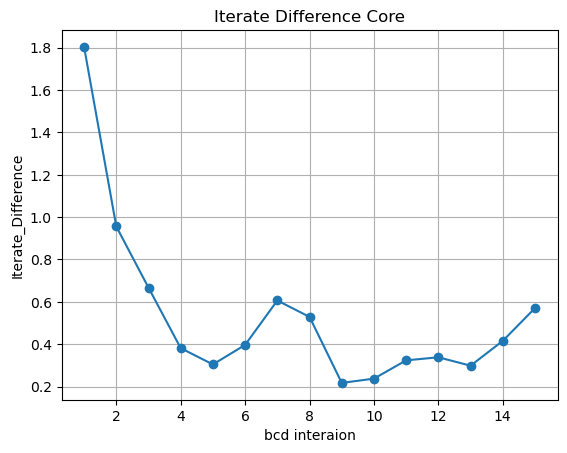

In [31]:
print(sgd_iterate_differences.shape)

separation_rank = 2
mode = 2

#Factor Matrices
for s in range(separation_rank):
    for k in range(mode):
        iterate_difference = sgd_iterate_differences[:,s,k]
        #plotting the difference 
        plt.figure()
        plt.plot(range(1, len(iterate_difference) + 1), iterate_difference,marker = 'o')
        # Setting the title and labels
        plt.title(f"Iterate Difference: {s+1} {k+1}")
        #plt.yscale('log')
        plt.xlabel('bcd interaion')
        plt.ylabel('Iterate_Difference')
        plt.grid(True)
        plt.show()

#Core Tensor 

iterate_difference_core = sgd_iterate_differences[:,1,2]

#plotting the difference 
plt.figure()
plt.plot(range(1, len(iterate_difference_core) + 1), iterate_difference_core,marker = 'o')
# Setting the title and labels
plt.title(f"Iterate Difference Core")
#plt.yscale('log')
plt.xlabel('bcd interaion')
plt.ylabel('Iterate_Difference')
plt.grid(True)
plt.show()

### Epoch level Gradients

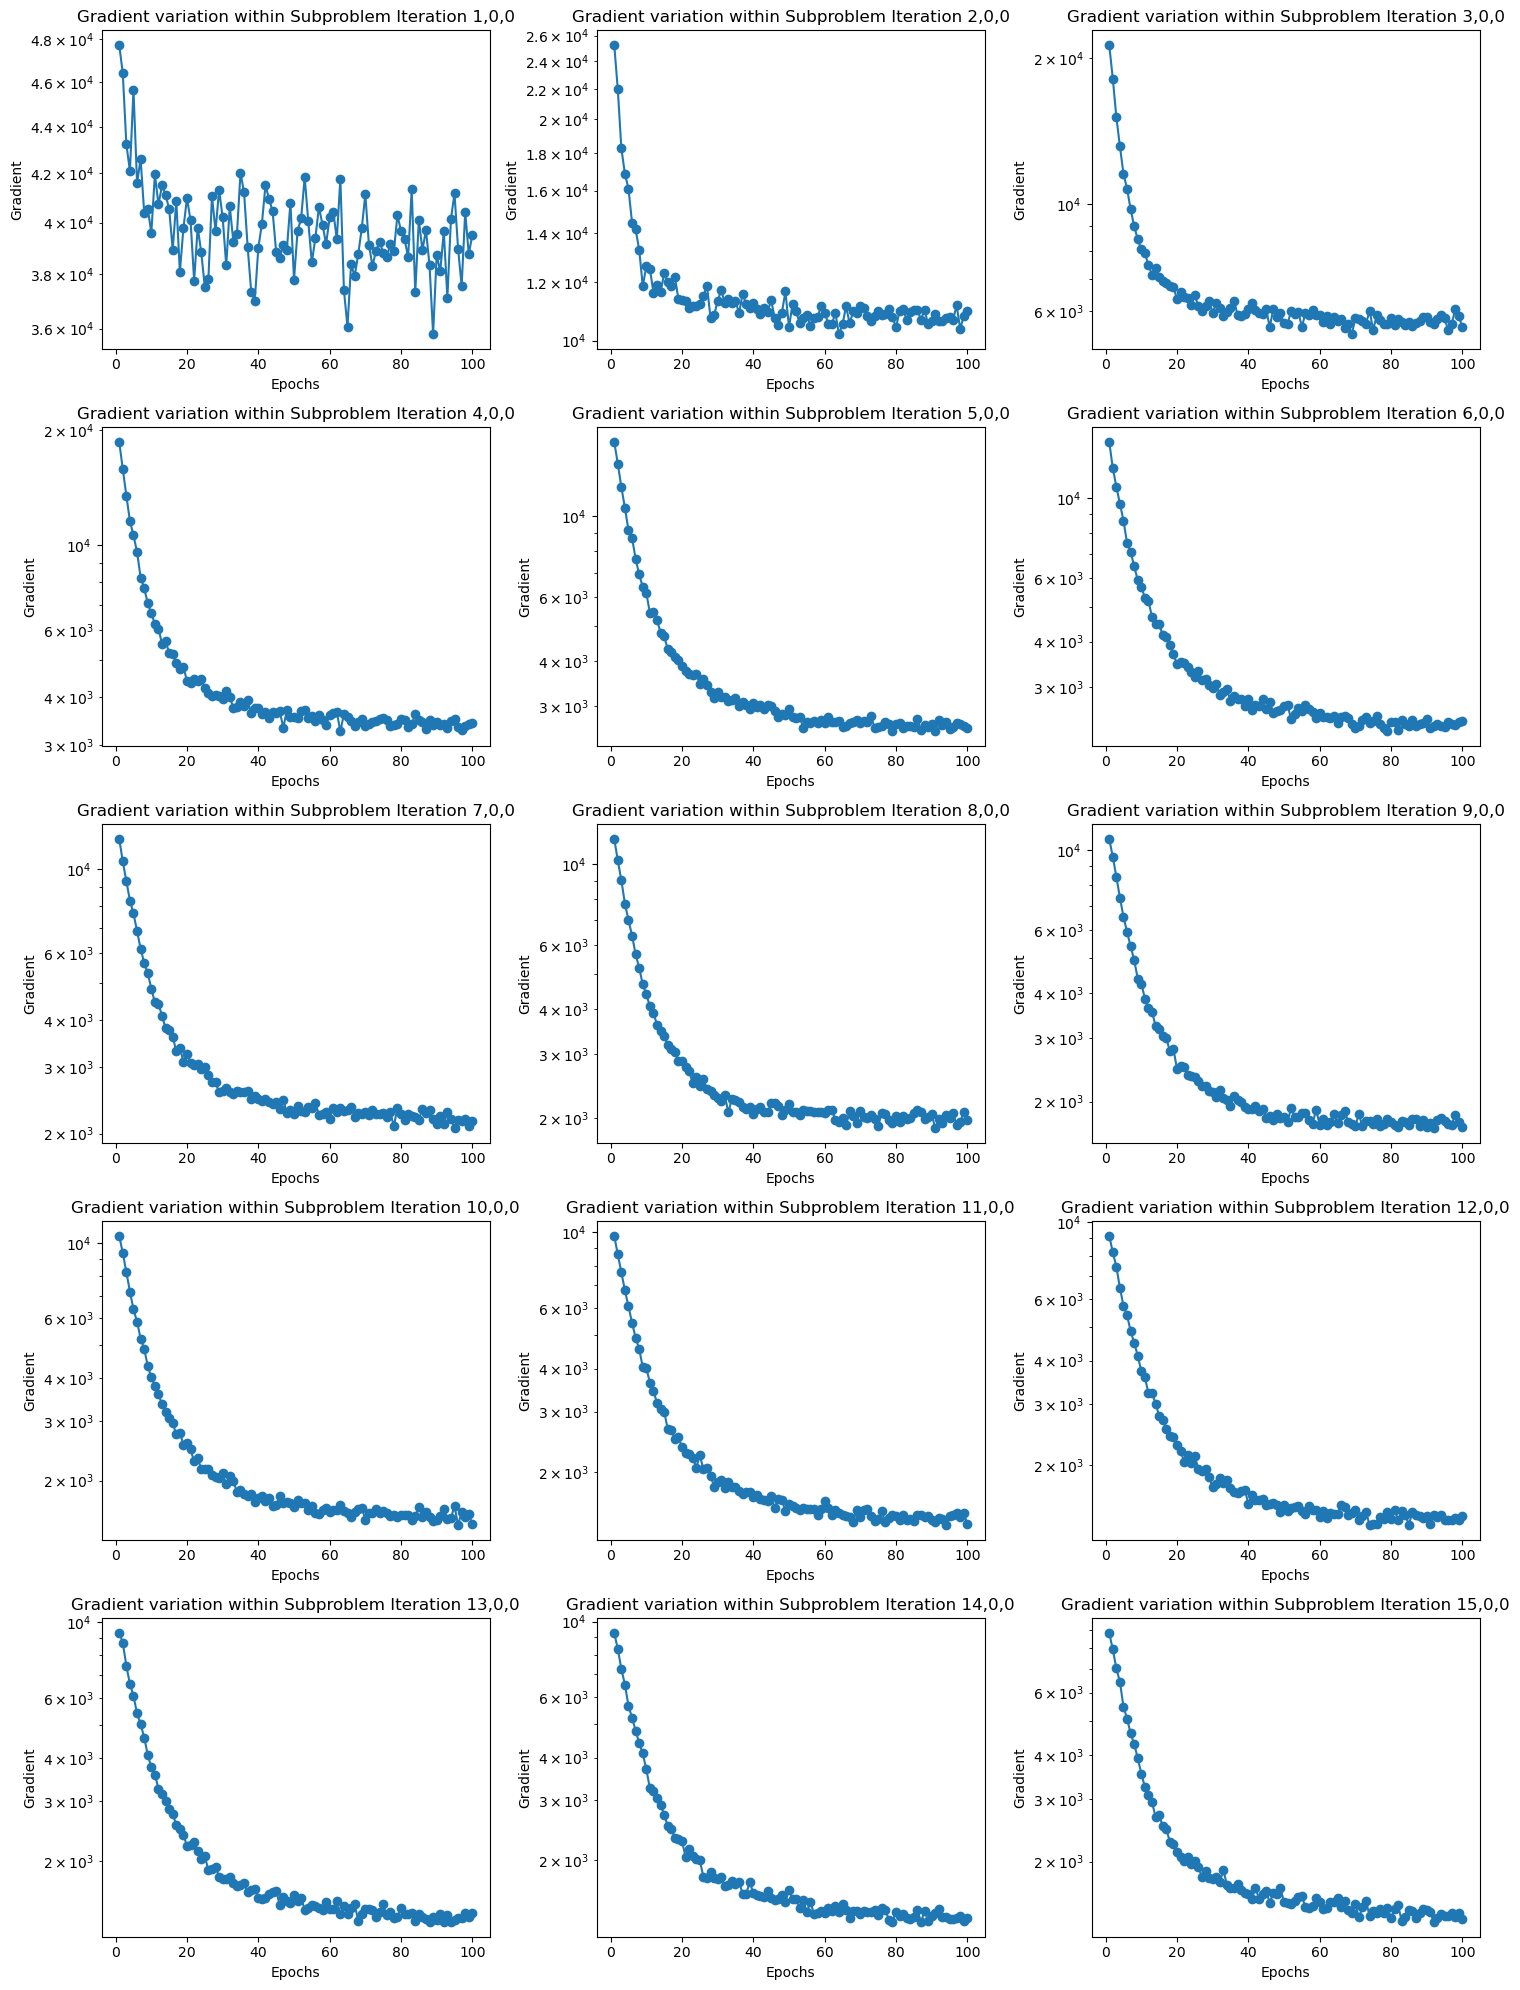

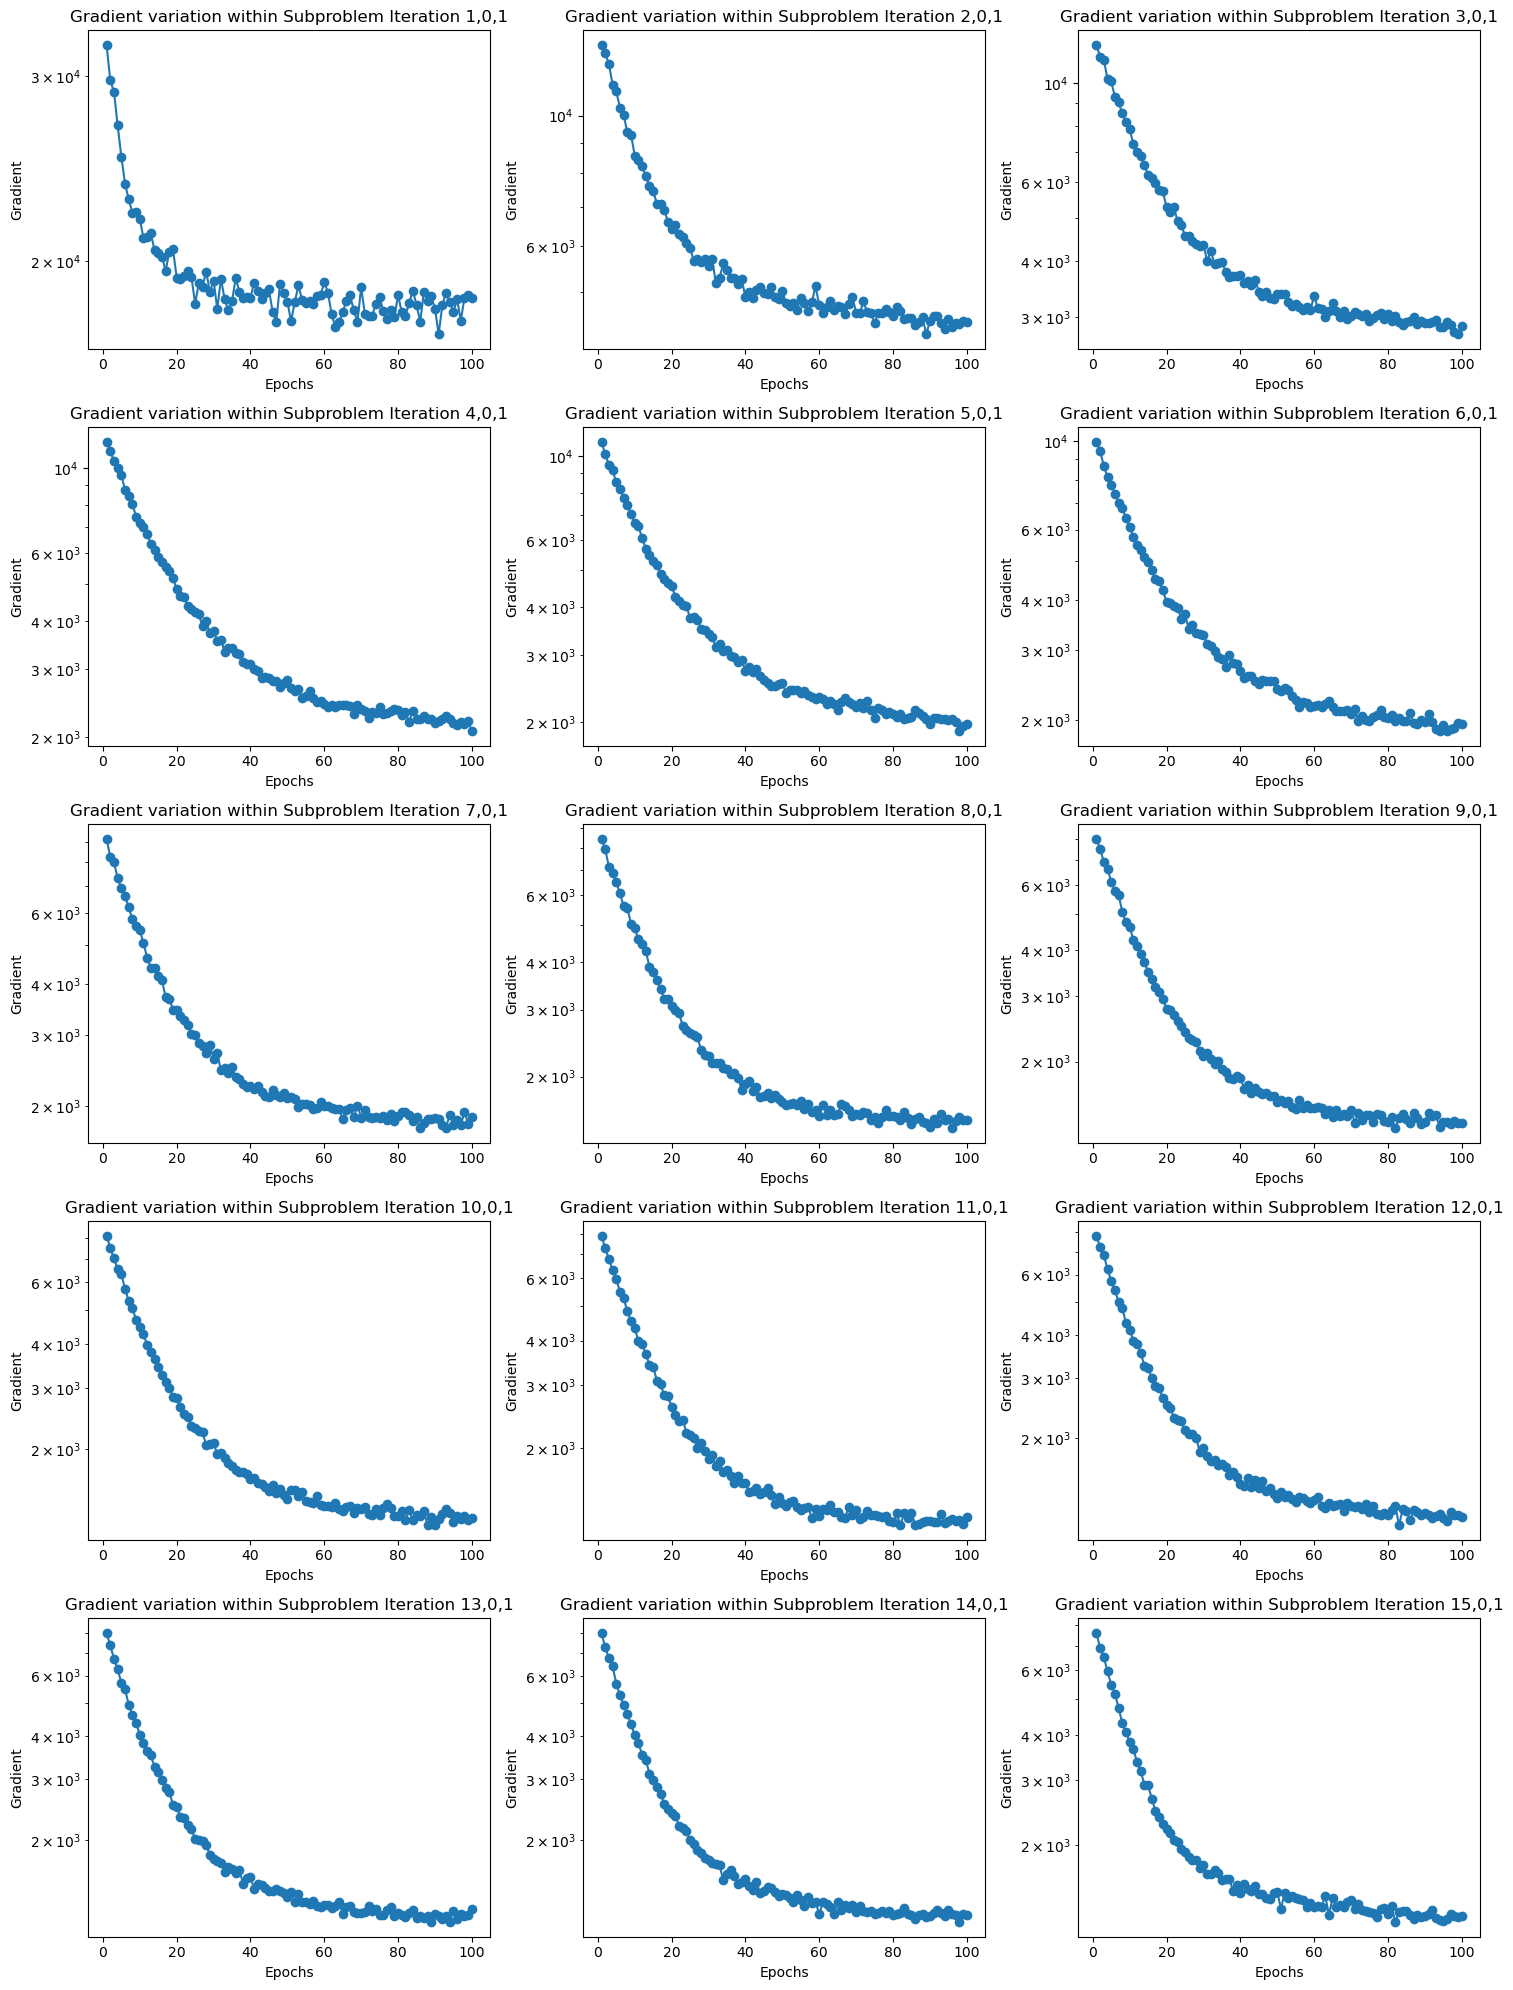

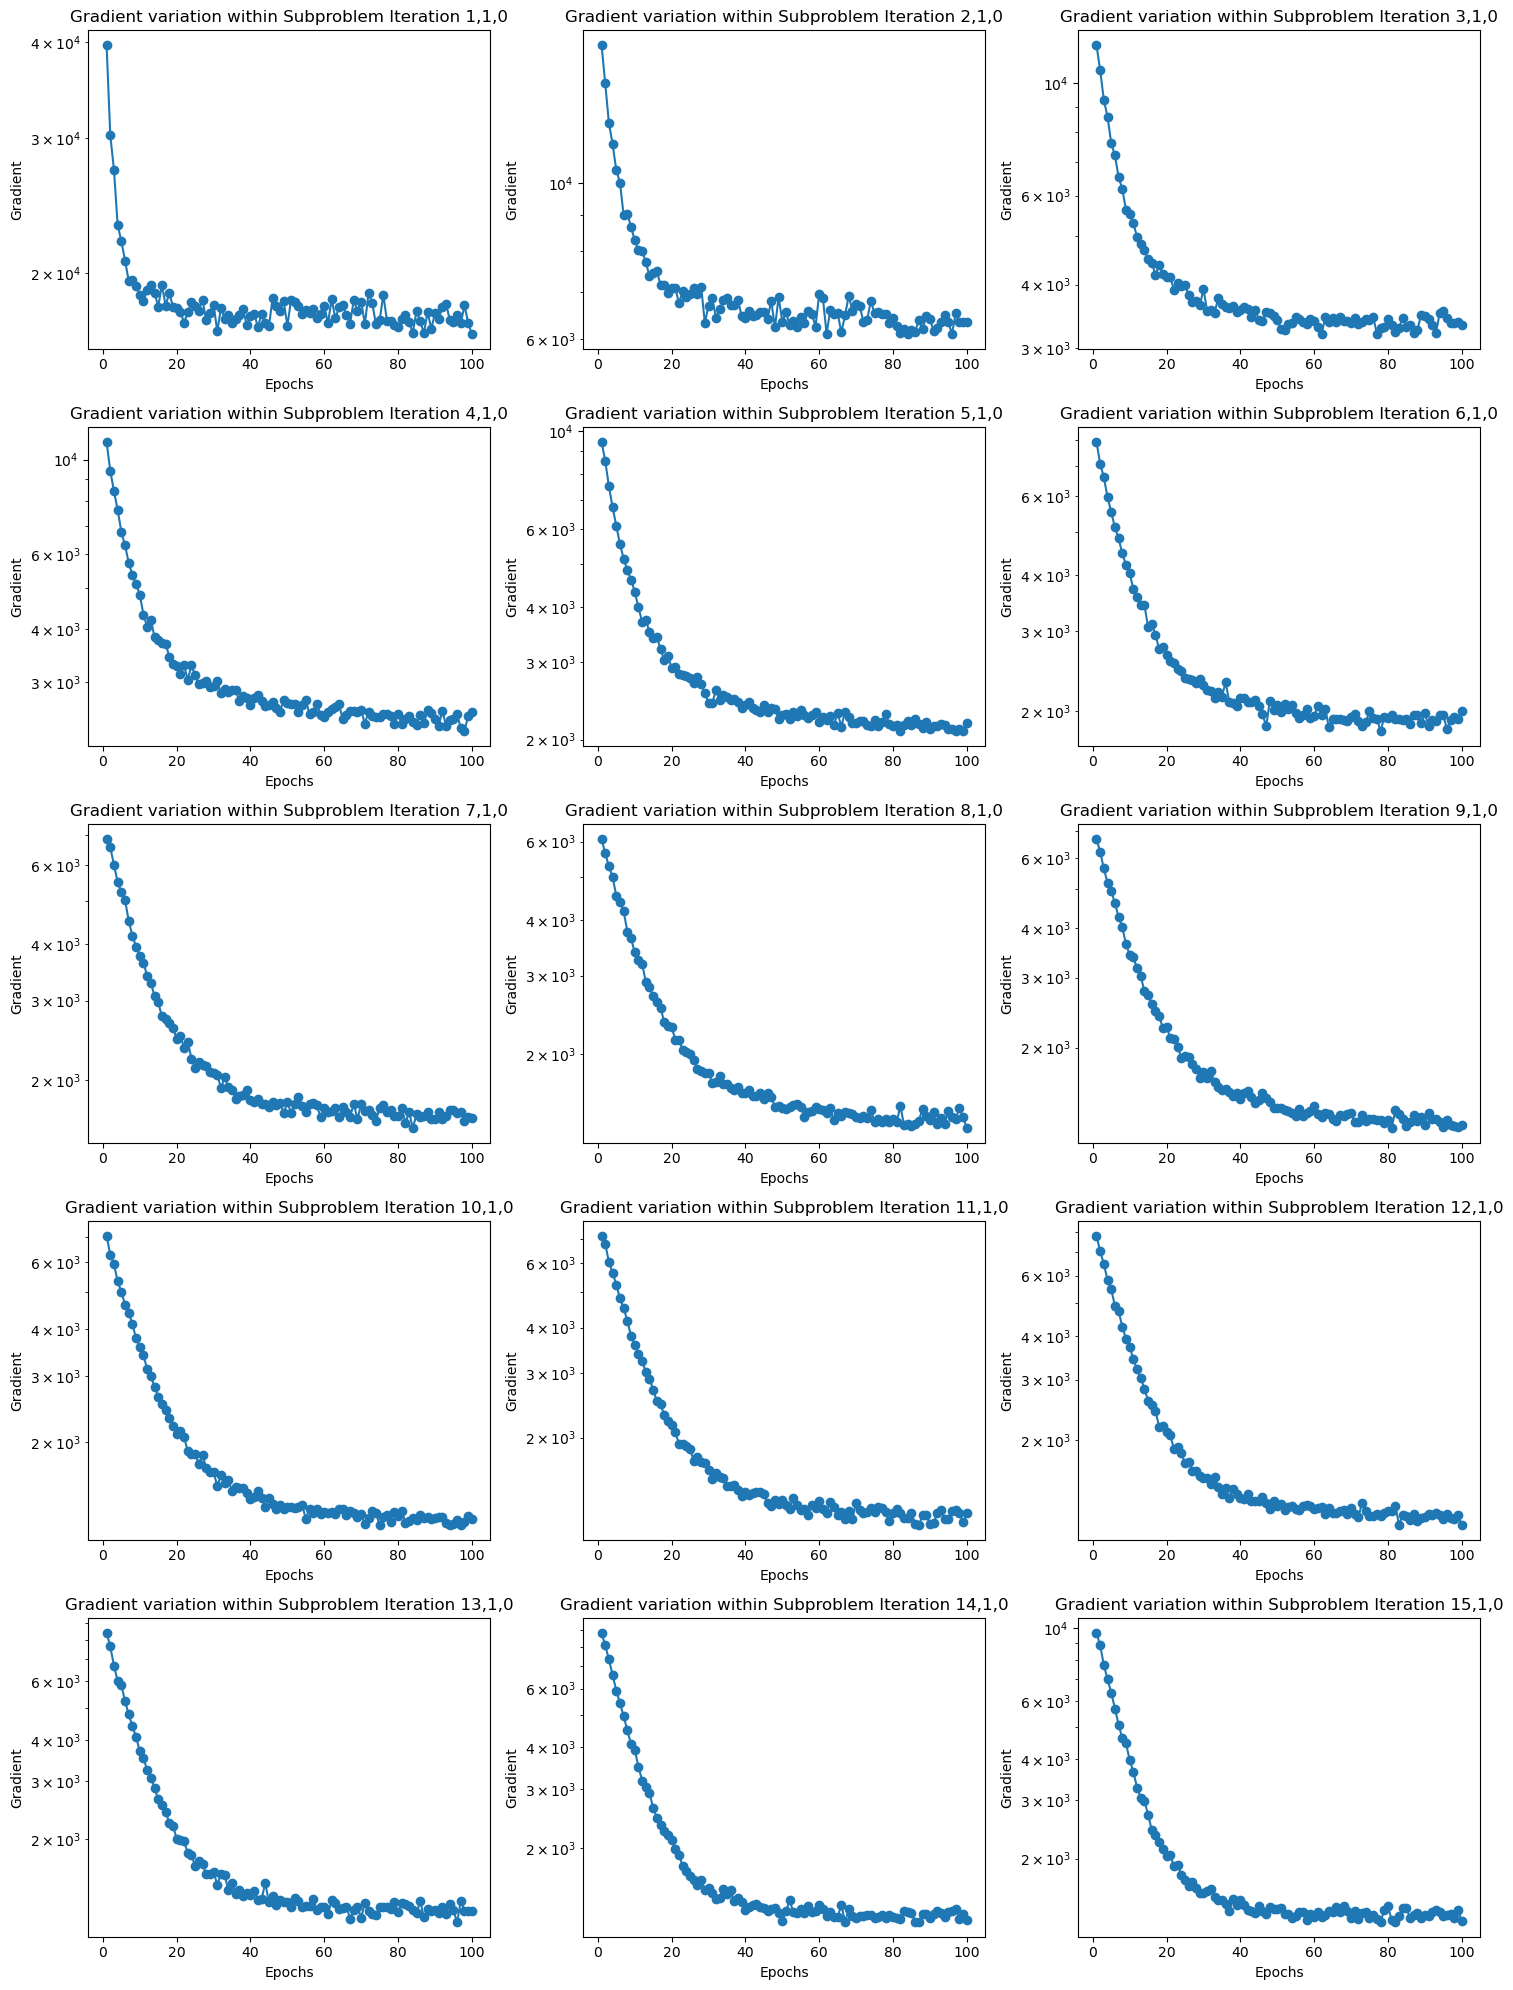

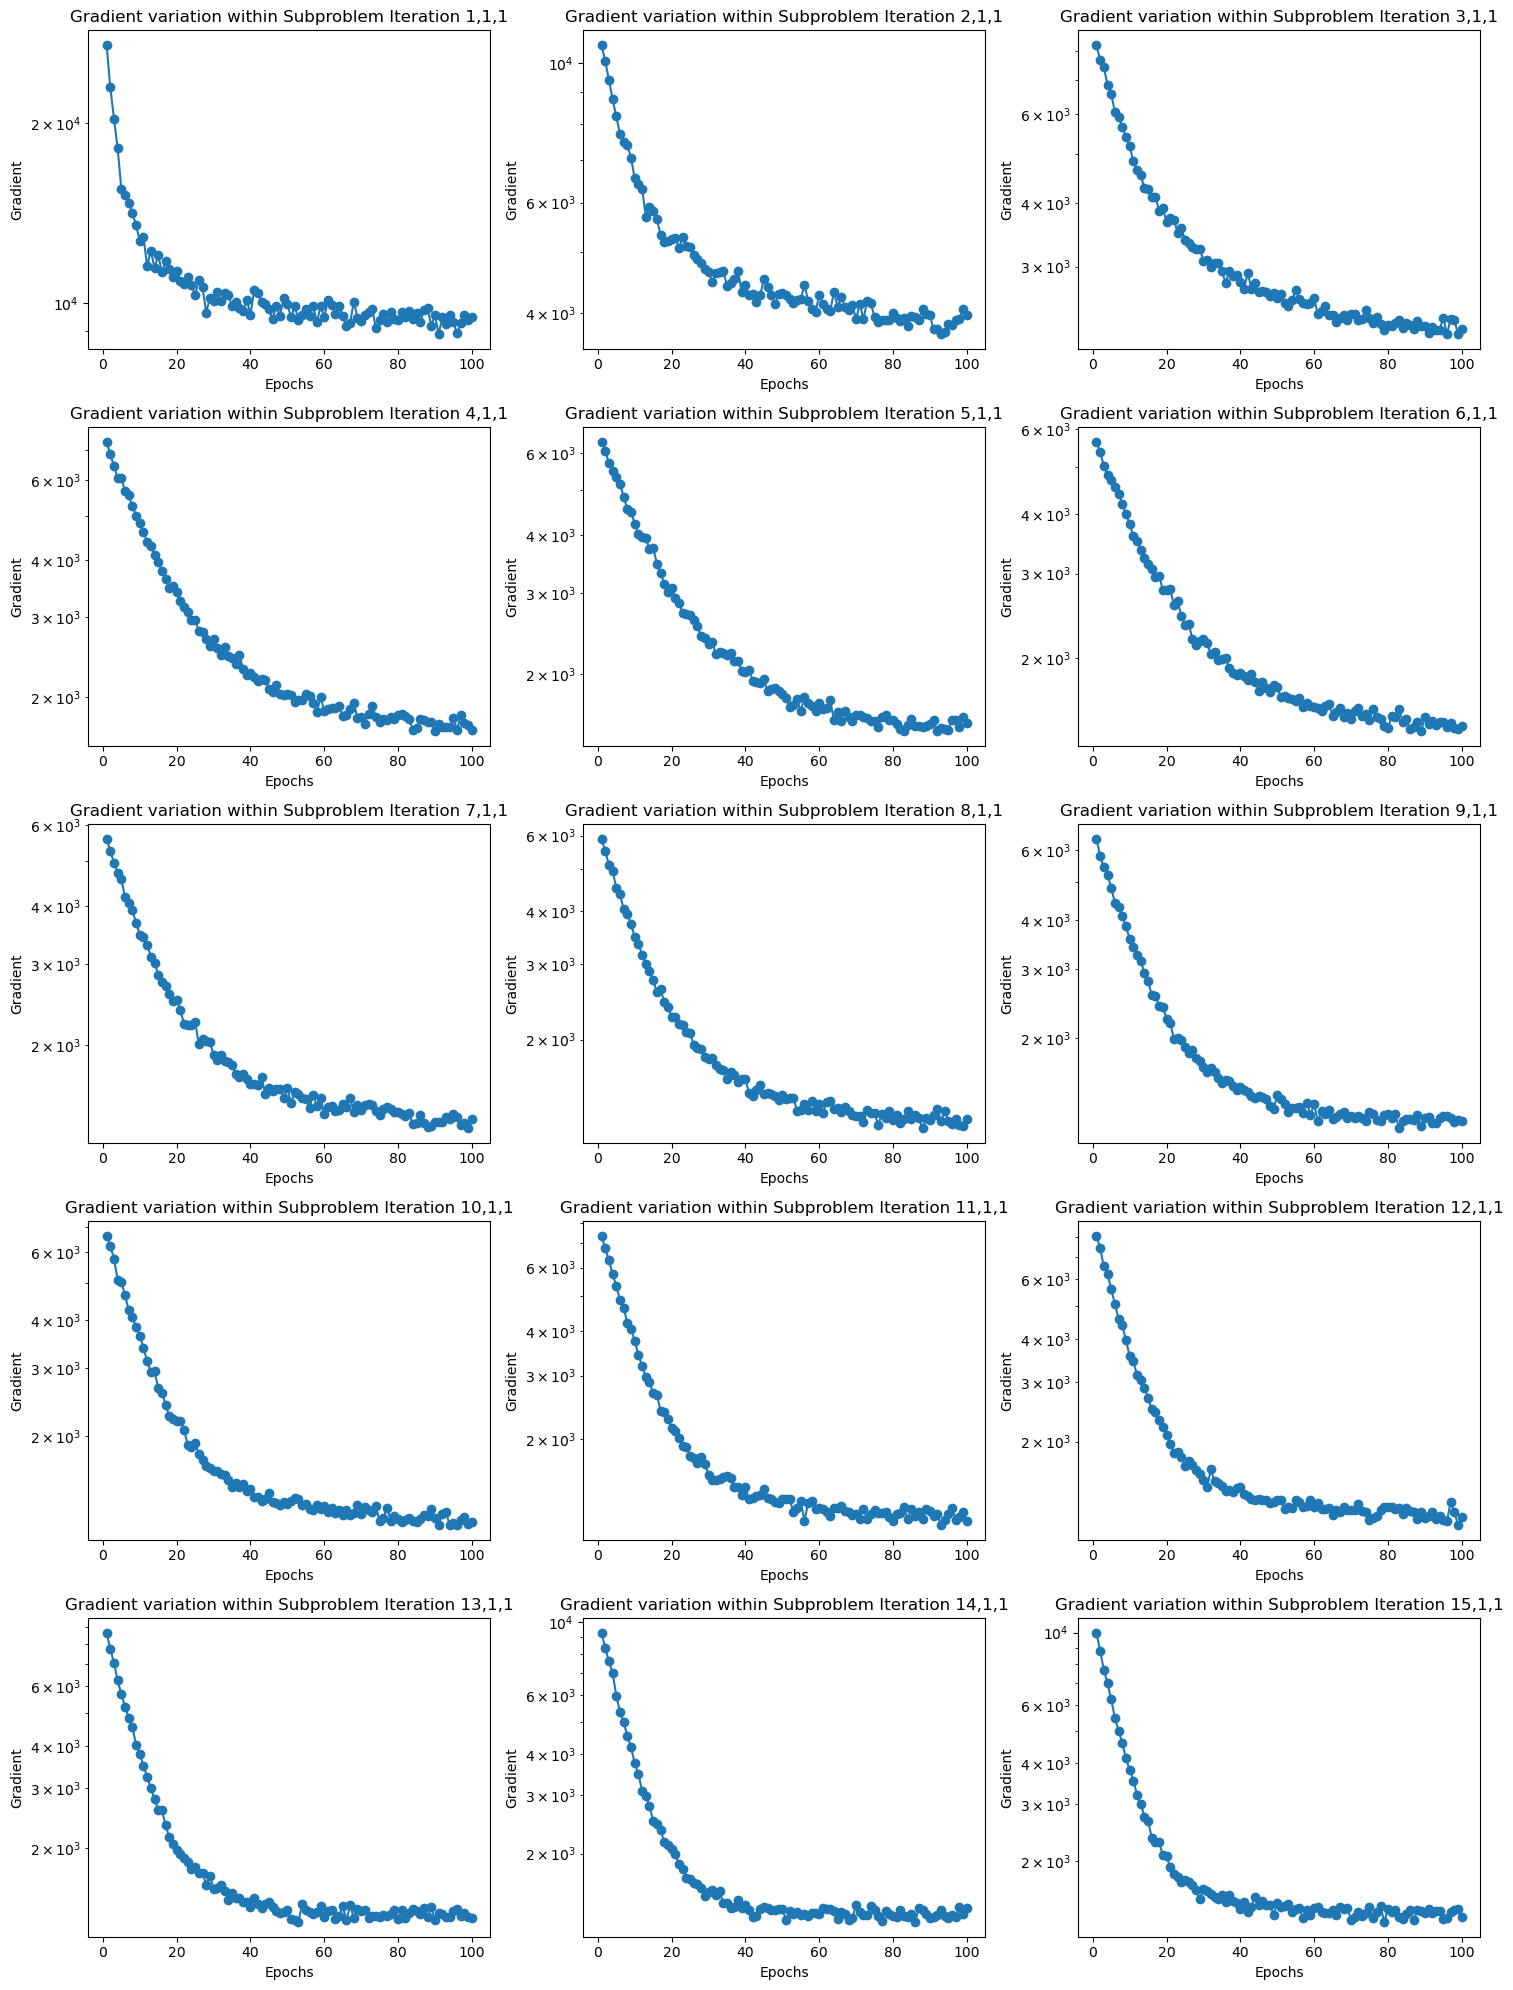

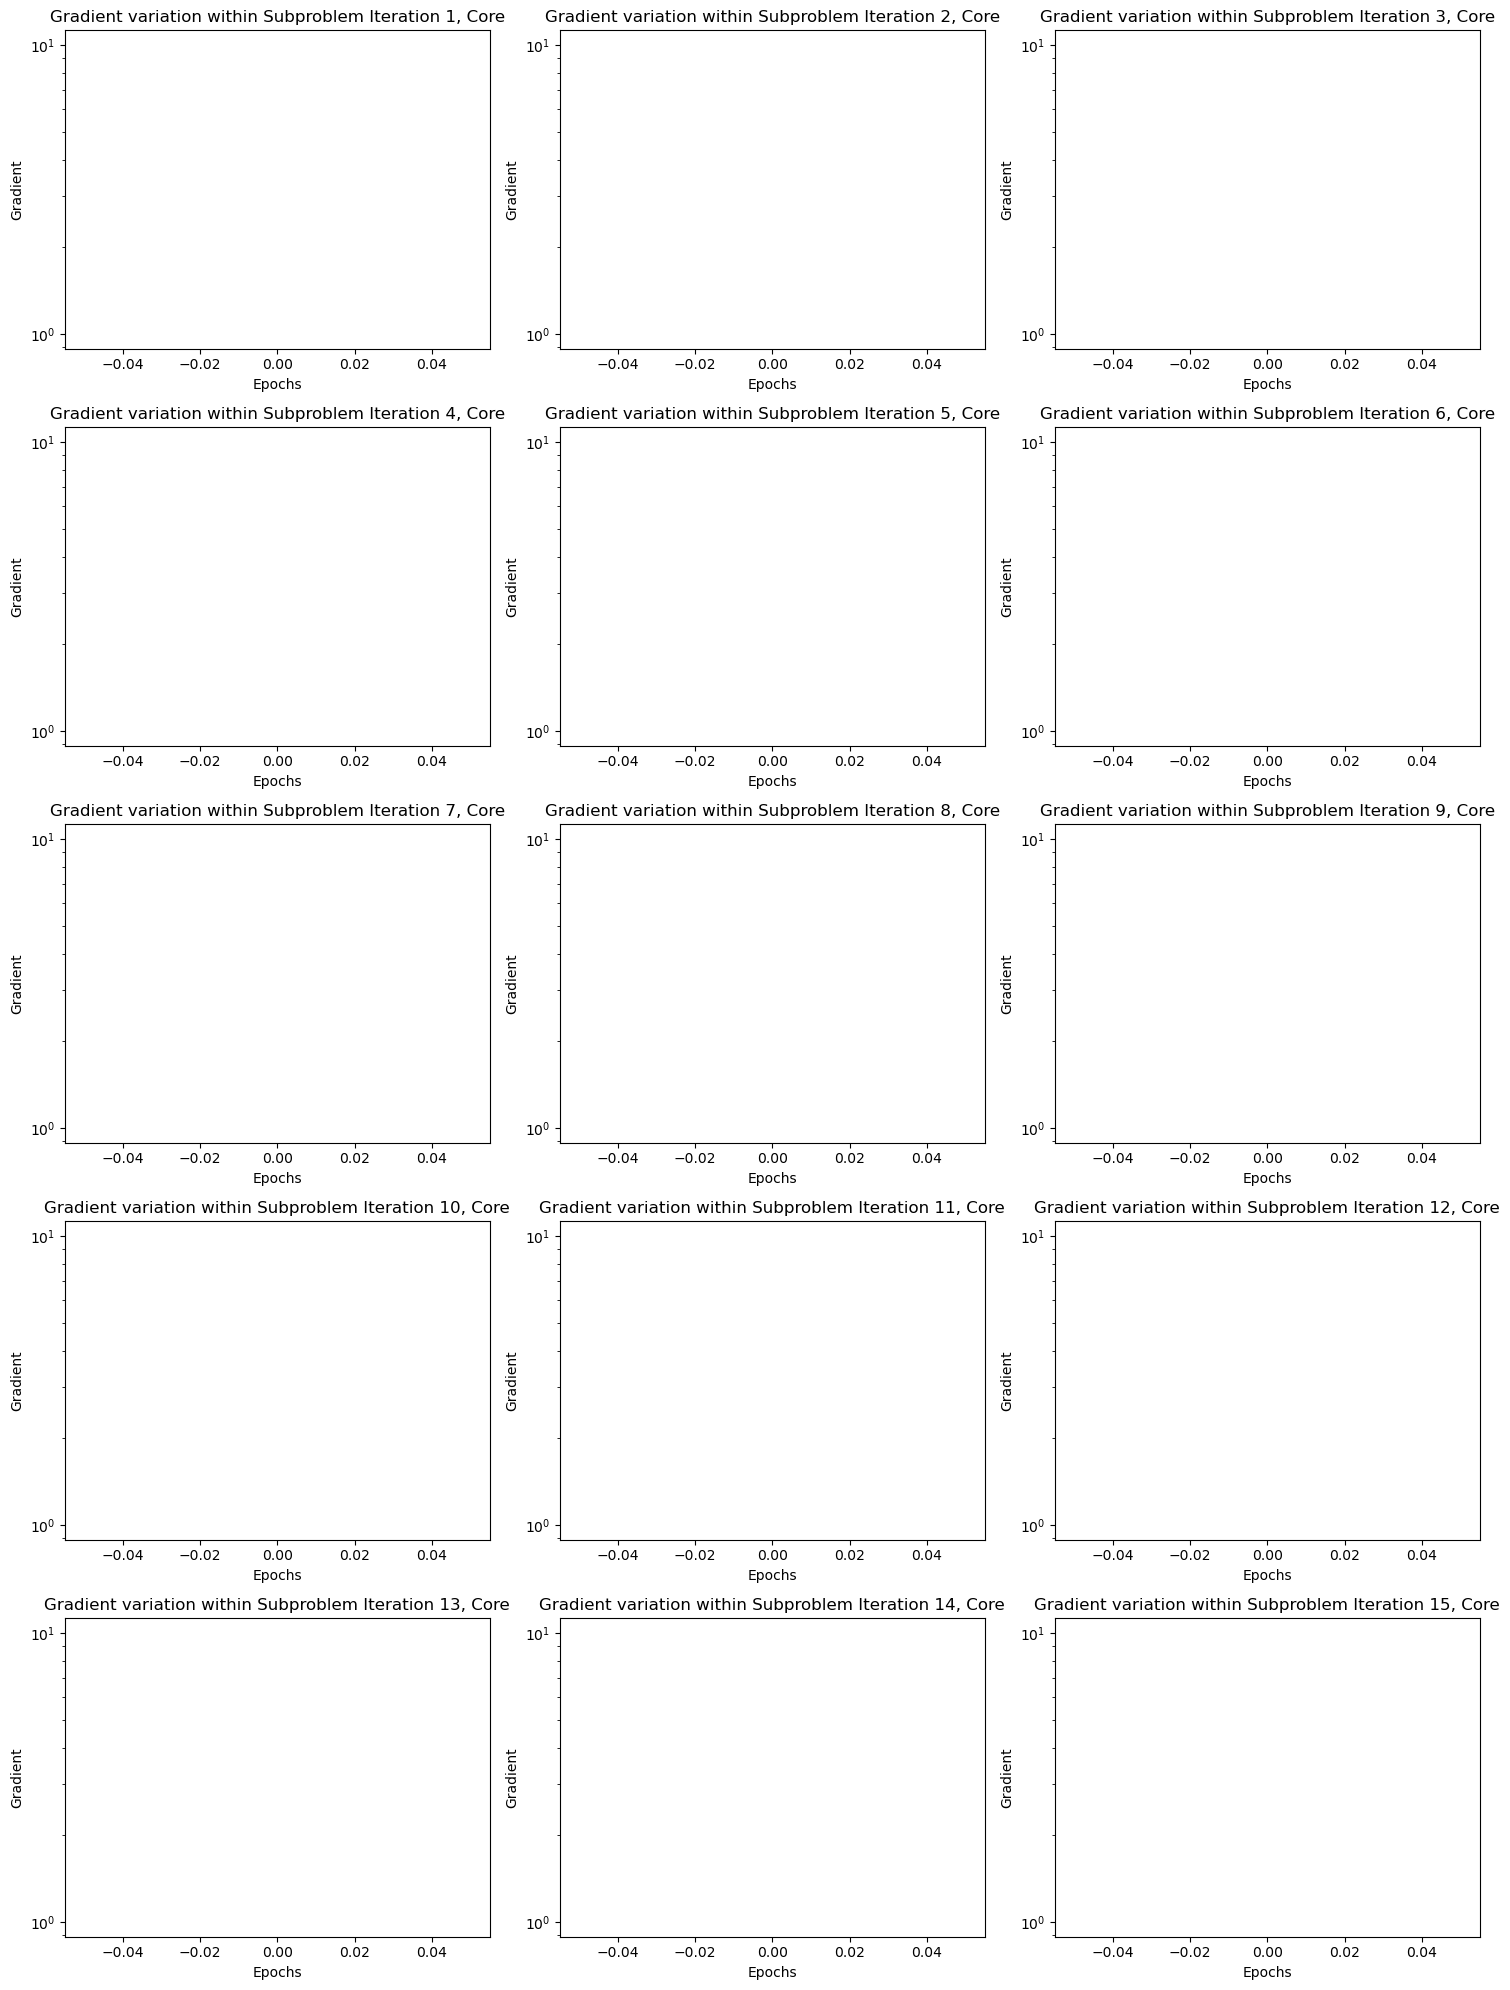

In [54]:
#Factor Matrices 

for s in range(separation_rank):
        for k in range(mode):
                # Number of iterations
                max_iter = sgd_epoch_level_gradients.shape[0]

                # Define the number of rows and columns for the subplots
                rows = 5
                columns = int(np.ceil(max_iter / rows))

                # Create a figure and a set of subplots
                fig, axes = plt.subplots(rows, columns, figsize=(15, 20))

                # Flatten the axes array for easy iteration
                axes = axes.flatten()

                # Loop through each combination of the 2nd and 3rd dimensions
                for i in range(max_iter):
                    ax = axes[i]  # Get the appropriate subplot
                    
                    # Extract the data for the current subplot
                    plot_data = sgd_epoch_level_gradients[i, s, k, :]
                    
                    # Plot the data
                    ax.plot(range(1, len(plot_data) + 1), plot_data, marker='o')
                    
                    # Set the title for each subplot
                    ax.set_title(f'Gradient variation within Subproblem Iteration {i+1},{s},{k}')
                    
                    # Set the labels
                    ax.set_xlabel('Epochs')
                    ax.set_ylabel('Gradient')
                    ax.set_yscale('log')

                # Hide any unused subplots
                for j in range(max_iter, len(axes)):
                    fig.delaxes(axes[j])

                # Adjust layout to prevent overlap
                plt.tight_layout()

                # Show the plot
                plt.show()

#core tensor 

# Number of iterations
max_iter = sgd_epoch_level_gradients.shape[0]

# Define the number of rows and columns for the subplots
rows = 5
columns = int(np.ceil(max_iter / rows))

# Create a figure and a set of subplots
fig, axes = plt.subplots(rows, columns, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each combination of the 2nd and 3rd dimensions
for i in range(max_iter):
    ax = axes[i]  # Get the appropriate subplot
    
    # Extract the data for the current subplot
    plot_data = sgd_epoch_level_gradients[i, 0, 2, :]
    
    # Plot the data
    ax.plot(range(1, len(plot_data) + 1), plot_data, marker='o')
    
    # Set the title for each subplot
    ax.set_title(f'Gradient variation within Subproblem Iteration {i+1}, Core')
    
    # Set the labels
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Gradient')
    ax.set_yscale('log')

# Hide any unused subplots
for j in range(max_iter, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()





In [36]:
    # Create a figure with two horizontal subplots
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plotting in the first subplot (ax1)
    #ax1.plot(range(1, len(loss_values) + 1), loss_values, marker='o')
    #ax1.set_title('Subproblem Loss')
    #ax1.set_yscale('log')
    #ax1.set_xlabel('Epoch')
    #ax1.set_ylabel('Loss')
    #ax1.grid(True)

    # Plotting in the second subplot (ax2)
    #ax2.plot(range(1, len(sub_problem_gradient) + 1), sub_problem_gradient, marker='o')
    #ax2.set_title('Subproblem Gradient')
    #ax2.set_yscale('log')
    #ax2.set_xlabel('Epoch')
    #ax2.set_ylabel('Loss')
    #ax2.grid(True)

    # Adjust the layout to prevent overlap
    #plt.tight_layout()

    # Display the plot
    #plt.show()